In [1]:
import numpy as np

In [2]:
class Cluster:
  def __init__(self, centroid):
    self.centroid = centroid
    self.points = [] # List of points[[1,2,3], [2,1,4]] etc that belong to this cluster

  def update_centroid(self):
    points = np.array(self.points)
    self.centroid = np.mean(points, axis=0)

  def get_distance(self, point):
    return np.linalg.norm(self.centroid - point, axis=0)

  def add_point(self, point):
    self.points.append(point)

  def clear_points(self):
    self.points.clear()

In [3]:
class KMeans:
  def __init__(self, k=3, max_iters=100):
    self.k = k
    self.max_iters = max_iters

  def find_closest_cluster(self, point):
    minDist = self.clusters[0].get_distance(point)
    closestCluster = self.clusters[0]
    for cluster in self.clusters:
      dist = cluster.get_distance(point)
      if dist < minDist:
        minDist = dist
        closestCluster = cluster
    return closestCluster


  def fit(self, x):
    random_indices = np.random.choice(x.shape[0], size=self.k, replace=False) # Thank numpy for making this extra hard
    random_points = [x[i] for i in random_indices]

    self.clusters = [Cluster(point) for point in random_points]
    for i in range(self.max_iters):
      for point in x:
        closestCluster = self.find_closest_cluster(point)
        closestCluster.add_point(point)
      for cluster in self.clusters:
        cluster.update_centroid()
        cluster.clear_points()

  def predict(self, point):
    return id(self.find_closest_cluster(point)) # returns id to make plotting easier

In [4]:
from sklearn import datasets
x, y = datasets.make_blobs(n_samples=300, centers=3, cluster_std=1, random_state=42)

In [5]:
km = KMeans(3)
km.fit(x)

In [6]:
y = []
for i in range(len(x)):
  y.append(km.predict(x[i]))

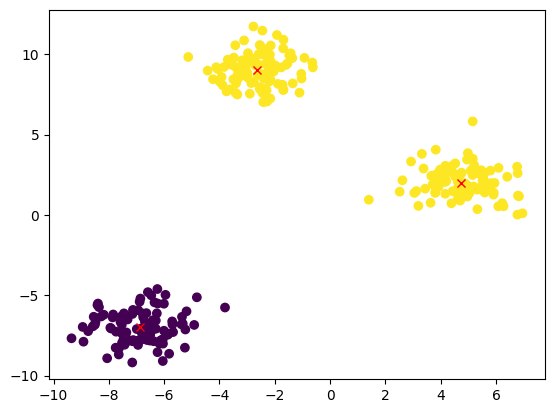

In [7]:

import matplotlib.pyplot as plt

plt.scatter(x[:,0], x[:,1], c=y )
for cluster in km.clusters:
  plt.plot(cluster.centroid[0], cluster.centroid[1], marker='x', color="red")